In [2]:
# Train-ResNet.ipynb (Python code format)

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
import matplotlib.pyplot as plt
import os




2025-07-17 02:16:05.258439: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-17 02:16:05.261492: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 02:16:05.270389: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-17 02:16:05.295520: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752736565.324849    2325 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752736565.33

In [3]:
# --- Load Dataset ---
image_size = (180, 180)
batch_size = 16
train_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "food_6",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="categorical"
)


Found 500 files belonging to 5 classes.
Using 400 files for training.
Found 500 files belonging to 5 classes.
Using 100 files for validation.


2025-07-17 02:16:12.607837: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

In [5]:
# --- Create Transfer Learning Model (ResNet50) ---
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=image_size + (3,))
base_model.trainable = False

inputs = tf.keras.Input(shape=image_size + (3,))
x = layers.Rescaling(1./255)(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation='softmax')(x)
model = models.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:

# --- Train Model ---
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 779ms/step - accuracy: 0.1906 - loss: 1.7204 - val_accuracy: 0.2800 - val_loss: 1.5943
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 740ms/step - accuracy: 0.2047 - loss: 1.6847 - val_accuracy: 0.1600 - val_loss: 1.6138
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 886ms/step - accuracy: 0.2098 - loss: 1.6775 - val_accuracy: 0.1200 - val_loss: 1.6147
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 898ms/step - accuracy: 0.1848 - loss: 1.6530 - val_accuracy: 0.2000 - val_loss: 1.6059
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 23s 901ms/step - accuracy: 0.2538 - loss: 1.6213 - val_accuracy: 0.2300 - val_loss: 1.5986
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 806ms/step - accuracy: 0.2107 - loss: 1.6238 - val_accuracy: 0.1900 - val_loss: 1.6039
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 24s 968ms/step - accuracy: 0.2019 - loss: 1.6673 - val_accuracy: 0.3100 - val_loss: 1.5887
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.2121 - loss: 1.6806 - val_accurac

In [8]:
# --- Save Model ---
model.save("resnet_model.keras")



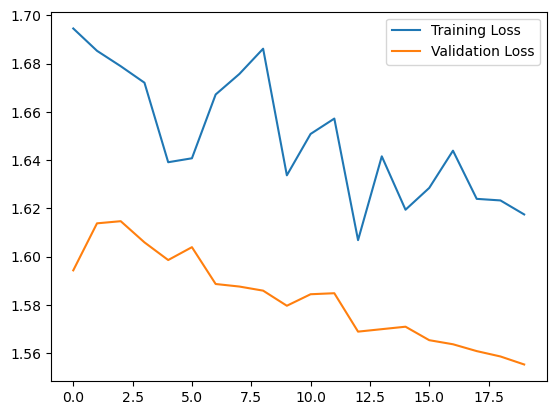

In [9]:
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

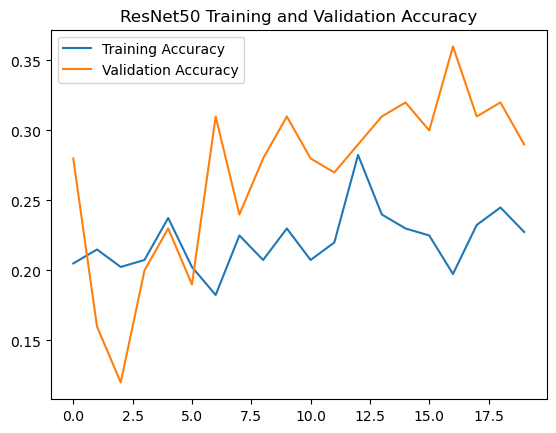

In [10]:
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("ResNet50 Training and Validation Accuracy")
plt.show()
